**Énoncé**

Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

    Quels sont les pays avec un fort potentiel de clients pour nos services?
    Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients?
    Dans quels pays l'entreprise doit-elle opérer en priorité?

**Mission**

Les données de la Banque mondiale sont disponibles à l’adresse suivante :

https://datacatalog.worldbank.org/dataset/education-statistics

Ou en téléchargement direct à ce [lien](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives/Projet+Python_Dataset_Edstats_csv.zip).

Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site :

http://datatopics.worldbank.org/education/

Pour la pré-analyse, pourrais-tu :

    Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées?)
    
    Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes?)
    
    Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise?)
    
    Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !

**Livrables attendus**

   -  Un *notebook* comportant les analyses pré-exploratoires réalisées (non cleané, pour comprendre votre démarche).
    
   -  Un *support de présentation* pour la soutenance.

**Notebook**

In [1]:
# Installer le pacquet termcolor
import sys
#!{sys.executable} -m pip install termcolor
!conda install --yes --prefix {sys.prefix} termcolor

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [2]:
# Importer les bibliothèques nécessaires pour ce projet

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sys
import sklearn
import datetime
from termcolor import colored
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Affichage des versions des bibliothèques utilisées
print('Test des versions des bibliothèques utilisées fait le : ' , datetime.datetime.now().isoformat())
print('-------------------- ' )

print('Version Python ------------------- ' , sys.version)
print('Version NumPy ------------------- ' , np.version.full_version)
print('Version Pandas ------------------- ' , pd.__version__)
print('Version Matplotlib ------------------- ' , mpl.__version__)
print('Version Seaborn  ------------------- ' , sns.__version__)
print('Version Sklearn ------------------- ' , sklearn.__version__)

Test des versions des bibliothèques utilisées fait le :  2022-10-12T09:23:12.009700
-------------------- 
Version Python -------------------  3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Version NumPy -------------------  1.21.5
Version Pandas -------------------  1.4.2
Version Matplotlib -------------------  3.5.1
Version Seaborn  -------------------  0.11.2
Version Sklearn -------------------  1.0.2


# 1.   **Importation des données et affichage de 3 lignes de chaque base**

In [4]:
database_name = ['EdStatsCountry','EdStatsCountry-Series','EdStatsData','EdStatsFootNote','EdStatsSeries']
chemin=''
extension='.csv'
database=[]
  
for i in range(len(database_name)):
    print(' -------------------------------------------------------------------------------------------')
    print ('Importation de la base ', colored(database_name[i], 'red', attrs=['bold']),':')
    data = pd.read_csv(chemin + database_name[i] + extension)
    data = pd.DataFrame(data)
    database.append(data)
    print (' Les 3 premèeres lignes de cette base : ')
    display(data.head(3))
    
EdStatsCountry=database[0]
EdStatsCountry_Series=database[1]
EdStatsData=database[2]
EdStatsFootNote=database[3]
EdStatsSeries=database[4]

 -------------------------------------------------------------------------------------------
Importation de la base  EdStatsCountry :
 Les 3 premèeres lignes de cette base : 


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


 -------------------------------------------------------------------------------------------
Importation de la base  EdStatsCountry-Series :
 Les 3 premèeres lignes de cette base : 


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


 -------------------------------------------------------------------------------------------
Importation de la base  EdStatsData :
 Les 3 premèeres lignes de cette base : 


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 -------------------------------------------------------------------------------------------
Importation de la base  EdStatsFootNote :
 Les 3 premèeres lignes de cette base : 


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN


 -------------------------------------------------------------------------------------------
Importation de la base  EdStatsSeries :
 Les 3 premèeres lignes de cette base : 


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.   **Analyse des Bases de données**

In [5]:
database = [EdStatsCountry,EdStatsCountry_Series,EdStatsData,EdStatsFootNote,EdStatsSeries]
description_jeu_donnees=[]
for i in range(len(database)):
    desc_base=[]
    print ('Analyse de la base ', colored(database_name[i], 'red', attrs=['bold']),':')
    print('1 ------------------------------------------------------------------------')
    print ('Quelques informations sur la base en utilisant la fonction info():\n')
    print (database[i].info())
    print('2 ------------------------------------------------------------------------')
    print ('Il y a ', database[i].shape[0], 'lignes et ', database[i].shape[1],'colonnes dans la base ',database_name[i])
    desc_base.append(database[i].shape[1])
    desc_base.append(database[i].shape[0])
        # données manquantes par colonnes
    print('3 ------------------------------------------------------------------------')
    print('Le nombre de données manquantes par colonnes : \n',database[i].isna().sum())
    # données manquantes dans toute la base
    print('4 ------------------------------------------------------------------------')
    print('Le nombre total de données manquantes est : \n',database[i].isna().sum().sum())
    desc_base.append(database[i].isna().sum().sum())

    # pourcentage des données manquantes 
    print('5 ------------------------------------------------------------------------')
    print('Le pourcentage des données manquantes est : \n',round(database[i].isna().mean().mean()*100,2),'%')
    desc_base.append(round(database[i].isna().mean().mean()*100,2))
    # nombre de doublons sur toutes les colonnes
    if database[i].duplicated().unique():
        print ('Il y a ', database[i].duplicated().sum(), 'lignes dupliquées')
        desc_base.append(database[i].duplicated().sum())
    else:
        print('Il n\'y a pas de doublons dans cette base')
        desc_base.append(0)
    print(colored('*******************************************************************************************************', 'blue'))
    description_jeu_donnees.append(desc_base)
    
jeu_donnees=pd.DataFrame(description_jeu_donnees,columns=['Colonnes','Lignes','Nbre donnees manquantes','% donnees manquantes','Nbre doublons'],index=database_name)
print('Tableau récapitulatif')
jeu_donnees

Analyse de la base  EdStatsCountry :
1 ------------------------------------------------------------------------
Quelques informations sur la base en utilisant la fonction info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    obj

Le nombre de données manquantes par colonnes : 
 Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64
4 ------------------------------------------------------------------------
Le nombre total de données manquantes est : 
 53455179
5 ------------------------------------------------------------------------
Le pourcentage des données manquantes est : 
 86.1 %
Il n'y a pas de doublons dans cette base
*******************************************************************************************************
Analyse de la base  EdStatsFootNote :
1 ------------------------------------------------------------------------
Quelques informations sur la base en utilisant la fonction info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0

,Colonnes,Lignes,Nbre donnees manquantes,% donnees manquantes,Nbre doublons
EdStatsCountry,32,241,2354,30.52,0
EdStatsCountry-Series,4,613,613,25.00,0
EdStatsData,70,886930,53455179,86.10,0
EdStatsFootNote,5,643638,643638,20.00,0
EdStatsSeries,21,3665,55203,71.72,0


# 3.   **Analyse approfondie de la base EdStatsData**

In [6]:
#  nombre d'indicateurs total
print("nombre d'indicateurs total : ",len(EdStatsData['Indicator Code'].unique()))

nombre d'indicateurs total :  3665


Les deux colonnes 'Indicator Code' et 'Indicator Name' sont importants pour notre analyse. Ils contiennent les indicateurs à analyser

In [7]:
# Description des données quantitatives 
EdStatsData.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


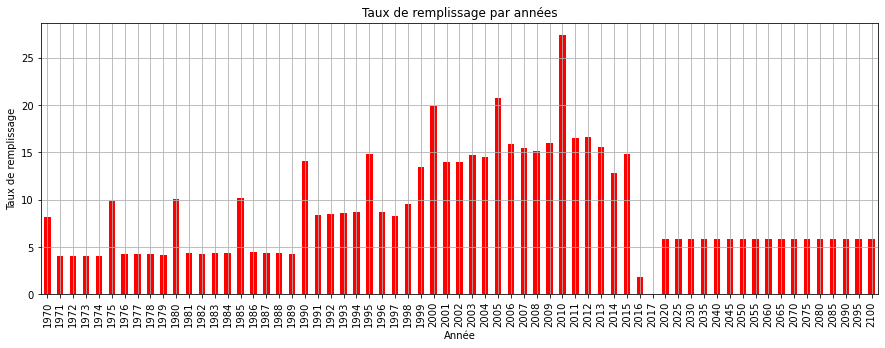

In [8]:
# Calcul du taux de remplissage  par année
import matplotlib.gridspec as gridspec

plt.figure(figsize=(15, 5))
G = gridspec.GridSpec(1, 1)

ax = plt.subplot(G[0, :])
taux_remplissage = 100-EdStatsData.loc[:,'1970':'2100'].isna().mean()*100
ax = taux_remplissage.plot(kind='bar', color='red')
ax.set_title('Taux de remplissage par années')
ax.set_xlabel('Année')
ax.set_ylabel('Taux de remplissage')
ax.grid(True)
plt.show()

Les données après 2016 sont représentées par palge de 5 ans.

Les données avant 2005 ont un taux de remplissage faible (<15% avec une exception pour l'année 2000) et sont anciennes donc ils nous donnent pas des informations sur l'état actuelle de chaque pays.

Conclusion : je ne vais garder que les données sur 10 ans (de 2005 à 2015)

In [9]:
# Suppression des colonnes des années avant 2005 et après 2015 et la derniere colonnes 'Unnamed' (colonne vide)
df_data =EdStatsData.copy()
df_data = df_data.drop(columns = df_data.loc[:,"1970":"2004"].columns)
df_data = df_data.drop(columns = df_data.loc[:,"2016":].columns)
# affichage de qcq lignes aprés suppression
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN


**Nettoyage des indicateurs**

In [10]:
# Suppression des lignes vides(pas de valeur dans les colonnes années)
annee = [str(i) for i in np.arange(2005, 2016, 1)]
print("Nombre de lignes vide à supprimer : ", len(df_data[df_data.loc[:,annee].isna().all(1)]))
df_data = df_data.dropna(how = 'all', subset = annee)

Nombre de lignes vide à supprimer :  547750


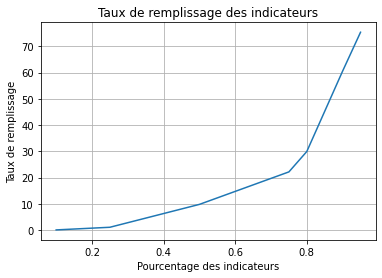

In [11]:
# Calculer le nombre de valeurs de chaque indicateur par année
df_data_indicateurs = df_data.groupby('Indicator Code')[annee].count()
df_data_indicateurs=df_data_indicateurs.reset_index()
# Ajouter une colonne 'Taux_remplissage' pour calculer le pourcentage de remplissage par indicateur sur toutes les années et tous les pays.

df_data_indicateurs['Taux_remplissage']=round((df_data_indicateurs[annee].sum(axis=1))*100/(df_data['Country Code'].nunique()*len(annee)),2)
quantilee=df_data_indicateurs[['Taux_remplissage']].quantile([0.1,0.25,0.5,0.75,0.8,0.9,0.95])
# Afficher un graphique qui représente le taux de remplissage des indicateurs 
plt.grid(True)
plt.title('Taux de remplissage des indicateurs')
plt.xlabel('Pourcentage des indicateurs')
plt.ylabel('Taux de remplissage')
plt.plot(quantilee)

Sur tous les indicateurs,  20% ont un taux de remplissage supérieur à 30%, et 10% ont un taux de remplissage supérieur à 60%.

Je vais choisir 60% comme seuil de taux de remplissage des indicateurs. Ce choix est fait pour avoir un taux de remplissage informatif et ne pas perdre trop d'informations

Il nous reste 373 indicateurs à analyser.

In [12]:
# Filtrer les données en utilisant un seuil de 60% comme taux de remplissage des indicateurs
df_data=pd.merge(df_data,df_data_indicateurs[['Indicator Code','Taux_remplissage']],on ='Indicator Code', how ='inner')
df_data=df_data[df_data['Taux_remplissage']>60]

print('Indicateurs restants :', df_data['Indicator Code'].nunique())
print('Pays restants :', df_data['Country Code'].nunique())

Indicateurs restants : 373
Pays restants : 242


**Choix des indicateurs**

In [13]:
# Ajouter la colonne 'Long definition' pour pouvoir chercher des mots-clés pertinents en utilisant une jointure avec la base EdStatsSeries
df_data=pd.merge(df_data,EdStatsSeries[['Indicator Name','Long definition']],on ='Indicator Name', how='inner')

In [14]:
# Afficher quelques lignes de la base après l'ajout d'une colonne
df_data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Taux_remplissage,Long definition
0,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,63.26,Total number of students of the official prima...
1,East Asia & Pacific,EAS,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,95.181770,94.709732,95.674072,95.730942,96.068748,96.166069,96.364761,96.322609,96.094063,96.207962,NaN,63.26,Total number of students of the official prima...
2,East Asia & Pacific (excluding high income),EAP,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,94.885033,94.360008,95.386147,95.439133,95.812241,95.923203,96.133148,96.097107,95.901901,96.025803,NaN,63.26,Total number of students of the official prima...


**Recherche des indicateurs pertinents par mots-clés**

Activité de l'entreprise : formations en ligne pour les lycéens et les étudiants.

Il faut choisir la bonne tranche d'age (mots-clés: school,education, 15,20 et 24) 

Il faut choisir une bonne connexion Internet (mots-clés: Internet) 

Il faut choisir un bon pouvoir d'acaht (mots-clés: gdp et economy)

Il faut choisir une population élevée (mots-clés: demography)

In [15]:
# Définir une liste de mots-clés suivant les critères choisis
liste_motscles=['demography','15','20','24','gdp','economy','internet','school','education']

In [16]:
# mettre la colonne 'Long definition' en minuscule pour chercher un seul mot-clé (par exemple 'internet' pour 'internet' et ' Internet')
df_data['Long definition'] = df_data['Long definition'].str.lower()
# chercher les mots-clés définis dans la colonne 'Long Definition'
liste_indicateurs=df_data[df_data['Long definition'].str.contains("|".join(liste_motscles))]['Indicator Name'].unique()
# Afficher le nombre d'indicateurs trouvés
print('Nous avons', len(liste_indicateurs), 'indicateurs qui peuvent nous intéressent')

Nous avons 178 indicateurs qui peuvent nous intéressent


In [17]:
# Affiher la liste des indicateurs trouvés
print('La liste des indicateurs qui peuvent nous intéresser après  sélection par mots cles:')
for k in liste_indicateurs:
    print(k)

La liste des indicateurs qui peuvent nous intéresser après  sélection par mots cles:
Adjusted net enrolment rate, primary, both sexes (%)
Enrolment in Grade 1 of primary education, both sexes (number)
Enrolment in Grade 1 of primary education, female (number)
Enrolment in Grade 2 of primary education, both sexes (number)
Enrolment in Grade 2 of primary education, female (number)
Enrolment in Grade 3 of primary education, both sexes (number)
Enrolment in Grade 3 of primary education, female (number)
Enrolment in Grade 4 of primary education, both sexes (number)
Enrolment in Grade 4 of primary education, female (number)
Enrolment in lower secondary education, both sexes (number)
Enrolment in lower secondary education, female (number)
Enrolment in lower secondary general, both sexes (number)
Enrolment in lower secondary general, female (number)
Enrolment in pre-primary education, both sexes (number)
Enrolment in pre-primary education, female (number)
Enrolment in primary education, both s

Après avoir analyser la liste des indicateurs trouvés, j'ai choisi seulement 5 indicateurs de la liste ('GNI per capita, PPP (current international $)','Internet users (per 100 people)','Population, ages 15-24, total','Gross enrolment ratio, secondary, both sexes (%)' et 'Gross enrolment ratio, tertiary, both sexes (%)').

Nous pouvons évidemment choisir d'autres indicateurs qui sont pertinents pour l'activité de l'entreprise comme '' mais dans l'énoncé de ce projet, il a été demandé de ne sélectionner que 4 ou 5 indicateurs.

Pour le choix de l'indicateur GNI et non GDP, on peut consulter cette page [investopedia](https://www.investopedia.com/terms/g/gross-national-income-gni.asp)

In [18]:
liste_nom_indicateurs_finale=['Internet users (per 100 people)',
                              'GNI per capita, PPP (current international $)',           
                              'Gross enrolment ratio, secondary, both sexes (%)',
                              'Gross enrolment ratio, tertiary, both sexes (%)',
                              'Population, ages 15-24, total']
# chercher le code de correspondant à chaque indicateur
liste_code_indicateurs_finale=[]
for k in liste_nom_indicateurs_finale:
    liste_code_indicateurs_finale.append(df_data.loc[df_data['Indicator Name']==k,'Indicator Code'].unique()[0])
print('La liste des codes desindicateurs est : ' ,liste_code_indicateurs_finale)

La liste des codes desindicateurs est :  ['IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SP.POP.1524.TO.UN']


In [19]:
# donner des abréviations au noms d'indicateurs retenus
# Richesse pour 'GNI per capita, PPP (current international $)'
# Internet pour 
# Population_15_24 pour
# Lycéens pour 'Gross enrolment ratio, secondary, both sexes (%)''
# Etudiants pour 'Gross enrolment ratio, tertiary, both sexes (%)'
liste_nom_indicateurs_finale=['Internet', 'Richesse'  ,'Lycéens' , 'Etudiants','Population_15_24']

In [20]:
# Suppresion des indicateurs non appertenant à la liste choisie
df_data=df_data[df_data['Indicator Code'].isin(liste_code_indicateurs_finale)]
#print(df_data.info())
print('Le nombre d\'indicateurs restants :', df_data['Indicator Code'].nunique())
print('Le nombre de pays restants :', df_data['Country Code'].nunique())

Le nombre d'indicateurs restants : 5
Le nombre de pays restants : 235


In [21]:
# ré-indexer la base après suppression de données
df_data=df_data.reset_index(drop = True)
#df_data.head()

In [22]:
# Vérification de la représentation des indicateurs sur les pays
print("Sur un total de ", df_data['Country Code'].nunique(), " pays, nous avons :")
df_data.loc[df_data["Indicator Code"].isin(liste_code_indicateurs_finale),:].groupby(['Indicator Code']).count()['Country Name']

Sur un total de  235  pays, nous avons :


Indicator Code
IT.NET.USER.P2       229
NY.GNP.PCAP.PP.CD    214
SE.SEC.ENRR          214
SE.TER.ENRR          197
SP.POP.1524.TO.UN    191
Name: Country Name, dtype: int64

Nous remarquons bien que les indicateurs choisis sont bien présents pour la majorités des pays. Par exemple l'indicateur 'SE.TER.ENRR' est présent pour 197 pays

In [23]:
# Tourner le dataframe pour remplacer les valeurs nulles par la derniere valeur de la ligne et non de la colonne
df_data=df_data.T
#remplacer par la dernière valeur
df_data.loc['2005':'2015',:].fillna(method='ffill', inplace=True)
#remplacer par la prochaine valeur pour la première ligne

df_data.loc['2005':'2015',:].fillna(method='bfill', inplace=True)
# retourner au dataframe d'origine
df_data=df_data.T
df_data.isnull().sum().sum()

0

In [24]:
df_data2=df_data.copy()

In [25]:
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Taux_remplissage,Long definition
0,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,11369.47658,12356.841903,13132.708815,13824.485684,13852.502783,14284.023177,14996.156034,15846.498202,16141.560252,16141.560252,16141.560252,87.0,gni per capita based on purchasing power parit...
1,East Asia & Pacific,EAS,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,7979.803858,8800.95114,9767.941355,10405.054186,10758.261713,11738.672488,12601.058098,13499.991278,14389.108336,15330.472007,16149.931154,87.0,gni per capita based on purchasing power parit...
2,East Asia & Pacific (excluding high income),EAP,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,5148.206568,5846.666888,6693.465068,7354.394893,7865.504692,8709.694279,9525.4158,10384.409752,11165.939759,12118.246706,12921.630707,87.0,gni per capita based on purchasing power parit...
3,Euro area,EMU,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,30153.765259,32673.170524,34437.870873,35617.680976,34957.646314,36017.493732,37606.582828,38000.713691,39183.09099,40161.569361,41230.027134,87.0,gni per capita based on purchasing power parit...
4,Europe & Central Asia,ECS,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,20223.547172,22345.170045,23839.674401,25347.50264,24756.355149,25894.746869,27580.72937,28280.604601,29258.848142,29915.207287,30338.930111,87.0,gni per capita based on purchasing power parit...


Travailler avec les dernières valeurs de l'année 2015 pour avoir des informations récentes le plus possible.

Le trvail avec la moyenne, max, somme, .. n'as pas de sens pour notre type de données

In [26]:
# Travailler avec un dataframe réduit qui ne contient  que les colonnes utiles
df_data = df_data.pivot(index='Country Name',columns='Indicator Code',values='2015')
# supprimer les pays dont au moins un indicateur est manquants, ces pays ne seront pas utiles pour faire des comparaisons
df_data = df_data.dropna()
display(df_data.sample(10))

Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Name,,,,,
Algeria,38.2,14170.0,99.860191,36.922279,6467818.0
Rwanda,18.0,1790.0,36.68697,7.89708,2327612.0
"Gambia, The",16.5,1620.0,57.451832,3.10428,406035.0
Burundi,4.866224,800.0,42.480068,4.96606,2087945.0
Spain,78.6896,34760.0,129.810486,89.670143,4285743.0
Germany,87.5898,49060.0,102.665398,68.265587,8682394.0
Cabo Verde,47.961624,6080.0,92.89843,21.707821,124102.0
Mauritania,15.199127,3700.0,30.59811,5.62173,737608.0
Uzbekistan,42.8,6210.0,95.640182,8.78775,5897703.0


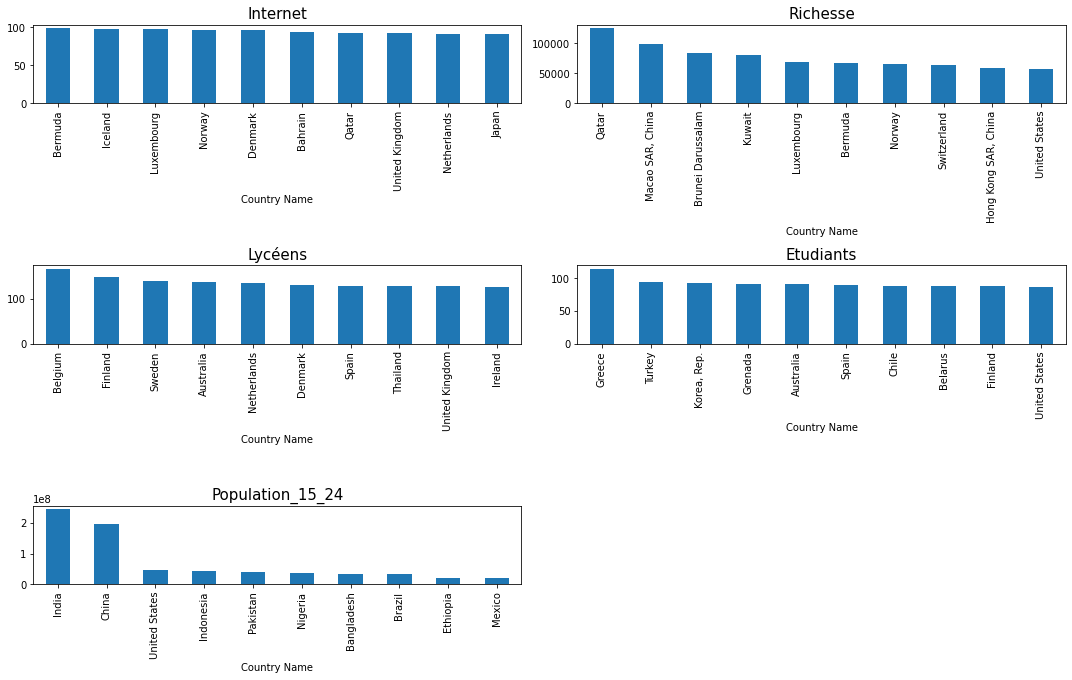

In [27]:
# Les 20 meilleurs pays selon chaque indicateur 

plt.figure(figsize=(15, 15))
i=1
for k in liste_code_indicateurs_finale:
    

    plt.subplot(5, 2,i )
    df_data[k].sort_values(ascending=False)[:10].plot.bar()

    plt.title(liste_nom_indicateurs_finale[liste_code_indicateurs_finale.index(k)],fontsize=15)
    
    i+=1
    
    

plt.tight_layout()

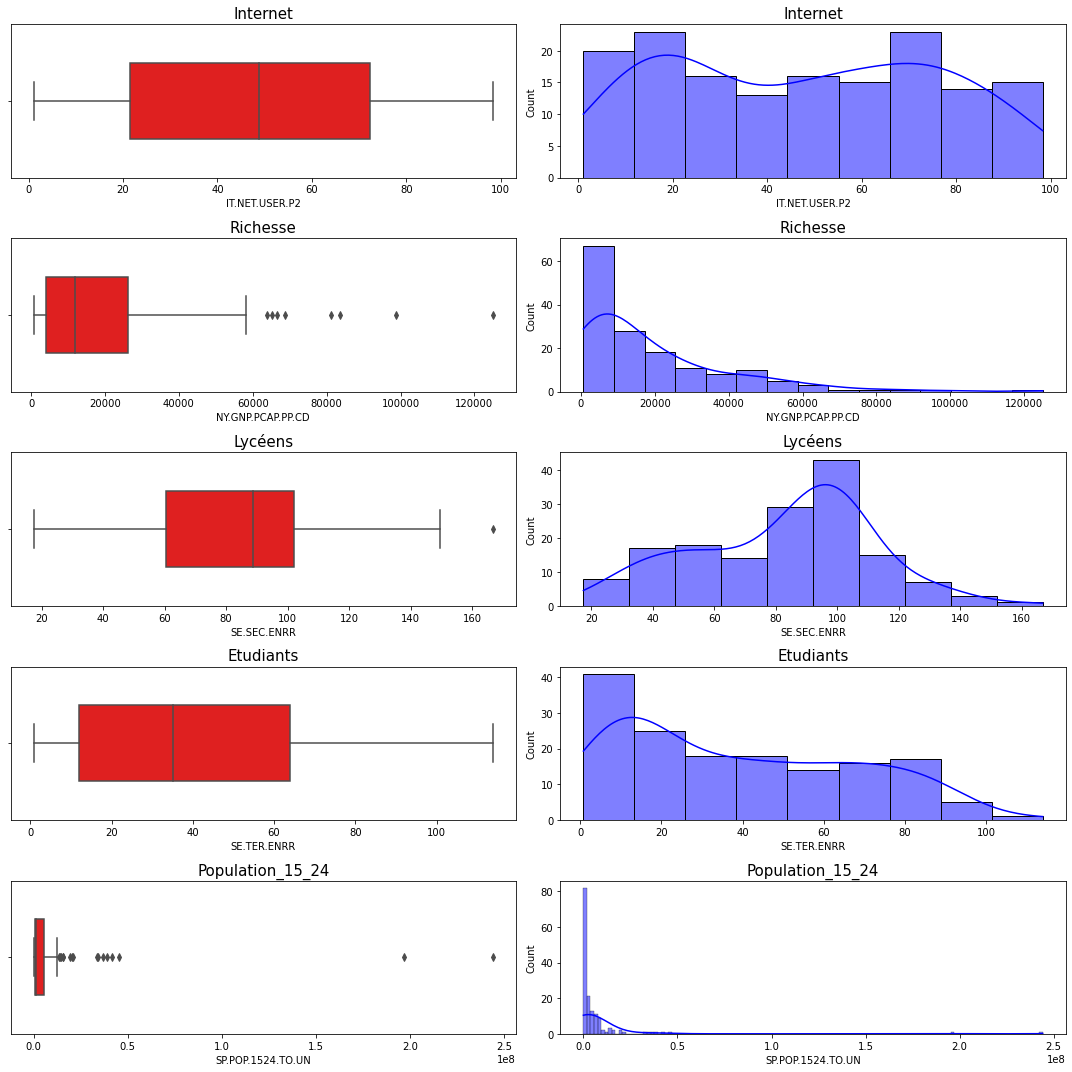

In [28]:
#histogramme et boîte à moustache de chaque indicateur
plt.figure(figsize=(15, 15))
i=1
for k in liste_code_indicateurs_finale:

    plt.subplot(5, 2,i )
    sns.boxplot(df_data[k], width=0.5, color='red')
    plt.title(liste_nom_indicateurs_finale[liste_code_indicateurs_finale.index(k)],fontsize=15)
    i+=1
    plt.subplot(5,2, i )
    sns.histplot(df_data[k], kde=True, color='blue')
    plt.title(liste_nom_indicateurs_finale[liste_code_indicateurs_finale.index(k)],fontsize=15)
    i+=1

plt.tight_layout()

- Distribution étalée à droite pour les deux indicateurs 'Richesse' et 'Population_15_24'.

- Forme bimodale pour les indicateurs 'Internet' et 'Lycéensé. On trouve 2 pics dans chaque distribution.

- Présence de plusieyrs valeurs aberrantes pour les indicateurs 'Population_15_24' et 'Richesse'.

In [29]:
#Calcul des ordres de grandeur de chaque indicateur 
stat_mean=['moyenne']
stat_median=['médiane']
stat_var=['variance']
stat_std=['écart type']
stat_skew=['skewness']
stat_kurtosis=['kurtosis']

for i in df_data.columns.tolist():
    mean=round(df_data[str(i)].mean(),2)
    median=round(df_data[str(i)].median(),2)
    var=round(df_data[str(i)].var(),2)
    std=round(df_data[str(i)].std(),2)
    skew=round(df_data[str(i)].skew(),2)
    kurtosis=round(df_data[str(i)].kurtosis(),2)
    stat_mean.append(mean)
    stat_median.append(median)
    stat_var.append(var)
    stat_std.append(std)
    stat_skew.append(skew)
    stat_kurtosis.append(kurtosis)
    
stat_descriptives=[stat_mean,stat_median,stat_var,stat_std,stat_skew,stat_kurtosis]
df_stat_descriptives = pd.DataFrame(stat_descriptives,columns=['Mesure','Internet', 'Richesse'  ,'Lycéens' , 'Etudiants','Population_15_24'])
df_stat_descriptives

,Mesure,Internet,Richesse,Lycéens,Etudiants,Population_15_24
0,moyenne,47.60,1.953142e+04,82.75,38.85,7.449137e+06
1,médiane,48.88,1.190000e+04,88.67,35.08,1.493722e+06
2,variance,816.00,4.490851e+08,863.05,825.70,6.692897e+14
3,écart type,28.57,2.119163e+04,29.38,28.74,2.587063e+07
4,skewness,0.05,1.920000e+00,-0.19,0.44,7.690000e+00
5,kurtosis,-1.29,4.730000e+00,-0.33,-1.06,6.379000e+01


**- La moyenne** est la valeur correspondant au centre de gravité de l'ensemble des valeurs d'une variable.

**- La médiane** est la valeur centrale qui partage l’échantillon en 2 groupes de même effectif: 50 % au-dessus et 50 % en dessous.

**- La variance**  est la mesure de la dispersion des échantillons autour de la moyenne. 

**- L'écart-type** sert à mesurer la dispersion, ou l'étalement, d'un ensemble de valeurs autour de leur moyenne. Plus l'écart-type est faible, plus la population est homogène.

**- Le skewness** est une mesure d'asymétrie. L’asymétrie d’une distribution traduit la régularité (ou non) avec laquelle les observations se répartissent autour de la valeur centrale. On interprète cette mesure de cette manière :

    Si γ1=0, alors la distribution est symétrique.

    Si γ1>0 , alors la distribution est étalée à droite.

    Si γ1<0,  alors la distribution est étalée à gauche.
    
**- Le kurtosis** est une mesure d'aplatissement. On compare l'aplatissement par rapport à la distribution normale

    Si γ2=0, alors la distribution a le même aplatissement que la distribution normale.

    Si γ2>0, alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.

    Si γ2<0, alors les observations sont moins concentrées : la distribution est plus aplatie.

In [30]:
# Ne garder que les pays dont la population est supérieure à la moyenne

df_data=df_data[df_data['SP.POP.1524.TO.UN']>df_stat_descriptives.iloc[0,5]]

**** Normalisation****

 On peut faire une comparaison entre les techniques de normalisation et choisir la meilleure sur notre jeu de données 
 mais l normalisation ne fait pas partir de ce projet donc je vais choisir la normalisation Min-Max qui est la plus classique.

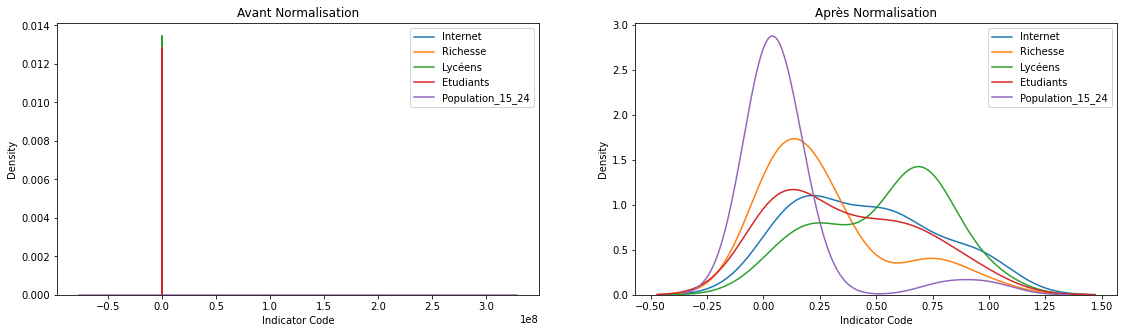

In [31]:
### Normalisation des données 
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler


scaler1 = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler1.fit_transform(df_data)

minmax_scaled_df = pd.DataFrame(minmax_scaled_df, 
                                columns=liste_code_indicateurs_finale,
                                index =df_data.index.to_list())

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(19, 5))
ax1.set_title('Avant Normalisation')
sns.kdeplot(df_data['IT.NET.USER.P2'], ax=ax1)
sns.kdeplot(df_data['NY.GNP.PCAP.PP.CD'], ax=ax1)
sns.kdeplot(df_data['SE.SEC.ENRR'], ax=ax1)
sns.kdeplot(df_data['SE.TER.ENRR'], ax=ax1)
sns.kdeplot(df_data['SP.POP.1524.TO.UN'], ax=ax1)
ax1.set_xlabel('Indicator Code')
ax1.legend(loc='upper right', labels=liste_nom_indicateurs_finale)

#"""
ax2.set_title('Après Normalisation')
sns.kdeplot(minmax_scaled_df['IT.NET.USER.P2'], ax=ax2)
sns.kdeplot(minmax_scaled_df['NY.GNP.PCAP.PP.CD'], ax=ax2)
sns.kdeplot(minmax_scaled_df['SE.SEC.ENRR'], ax=ax2)
sns.kdeplot(minmax_scaled_df['SE.TER.ENRR'], ax=ax2)
sns.kdeplot(minmax_scaled_df['SP.POP.1524.TO.UN'], ax=ax2)
ax2.set_xlabel('Indicator Code')
ax2.legend( loc='upper right', labels=liste_nom_indicateurs_finale)


plt.show()

In [32]:
df_data=minmax_scaled_df.copy()
df_data.sample(15)

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Sudan,0.258672,0.059657,0.184011,0.139137,0.007667
Germany,0.949995,0.845346,0.750993,0.709428,0.004712
Kenya,0.195011,0.039363,0.351678,0.004386,0.005644
Colombia,0.590757,0.224808,0.707750,0.571005,0.006051
South Africa,0.545566,0.213261,0.714632,0.172671,0.010275
"Egypt, Arab Rep.",0.385706,0.172323,0.594390,0.357701,0.033015
Mexico,0.608060,0.286914,0.636440,0.288671,0.053979
Bangladesh,0.120181,0.049335,0.380919,0.107520,0.113432
Philippines,0.565758,0.142232,0.616010,0.352484,0.049505
Brazil,0.618229,0.254899,0.722491,0.515536,0.110029


# 4.   **Définition d'un score et meilleurs pays**

In [33]:
# Somme des indicateurs avec pondération pour 'Richesse', 'Population_15_24' et 'Internet'
df_data['Score']=(2*df_data.iloc[:,0]+2*df_data.iloc[:,1]+df_data.iloc[:,2]+df_data.iloc[:,3]+2*df_data.iloc[:,4])/8

In [34]:
# Les  i meilleurs pays avec un fort potentiel de clients pour nos services selon le score défini
# saisir une valeur de i
i=10 
meilleurs_clients=df_data['Score'].sort_values(ascending=False)[:i].index.tolist()
meilleurs_clients

['United States',
 'Germany',
 'United Kingdom',
 'Japan',
 'France',
 'China',
 'Russian Federation',
 'Turkey',
 'India',
 'Brazil']

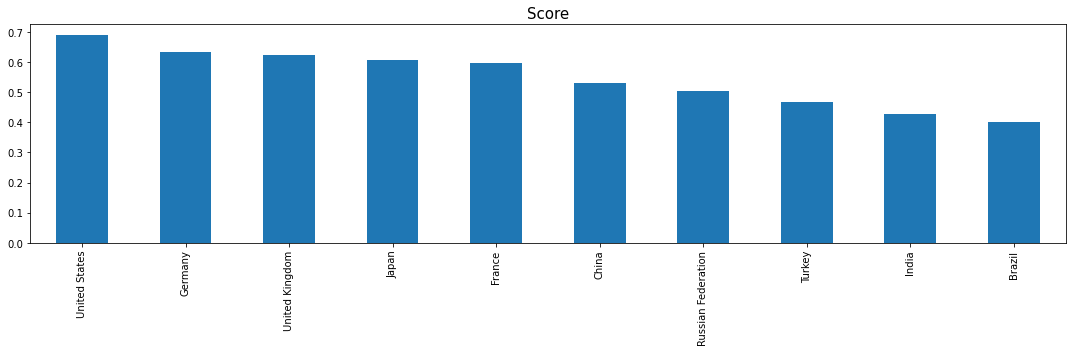

In [35]:
# Graphe représentant les i meilleurs pays selon le score défini
# saiasir une valeur de i
i=10 
plt.figure(figsize=(15, 5))
df_data['Score'].sort_values(ascending=False)[:i].plot.bar()
plt.title('Score',fontsize=15)
plt.tight_layout()

In [36]:
# reset index
df_data.reset_index(level=0, inplace=True)
df_data.rename(columns = {'index':'Country Name'}, inplace = True)
df_data.head(3)

,Country Name,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,Score
0,Bangladesh,0.120181,0.049335,0.380919,0.107520,0.113432,0.131792
1,Brazil,0.618229,0.254899,0.722491,0.515536,0.110029,0.400543
2,China,0.527209,0.239328,0.671891,0.436345,0.800917,0.530393


In [37]:
#Récupérer la région de chaque pays en utilisant 2 jointures avec les deux tables EdStatsData et EdStatsCountry
df_data=pd.merge(df_data,EdStatsData[['Country Code','Country Name']].drop_duplicates(),on='Country Name',how='left')
df_data=pd.merge(df_data,EdStatsCountry[['Country Code','Region']].drop_duplicates(),on='Country Code', how='left')

df_data.sample(5)

,Country Name,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,Score,Country Code,Region
16,Nigeria,0.234693,0.090098,0.306979,0.070523,0.122980,0.159131,NGA,Sub-Saharan Africa
0,Bangladesh,0.120181,0.049335,0.380919,0.107520,0.113432,0.131792,BGD,South Asia
19,Russian Federation,0.789226,0.390483,0.768179,0.842584,0.029990,0.503770,RUS,Europe & Central Asia
22,Tanzania,0.070295,0.032715,0.085279,0.000000,0.009645,0.038824,TZA,Sub-Saharan Africa
2,China,0.527209,0.239328,0.671891,0.436345,0.800917,0.530393,CHN,East Asia & Pacific


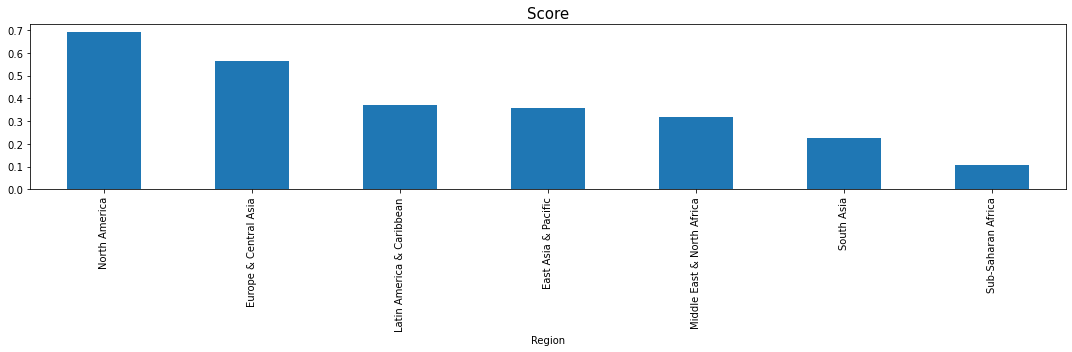

In [38]:
###### Les  meilleurs régions selon le score défini
df_region=pd.DataFrame(df_data[['Score','Region']])
score_region=df_region.groupby('Region')['Score'].mean()
plt.figure(figsize=(15, 5))
score_region.sort_values(ascending=False).plot.bar()
plt.title('Score',fontsize=15)
plt.tight_layout()

# 5.   **Evolution du potentiel de clients**

-------------------------------------------------------Internet---------------------------------------------------------------------------------------


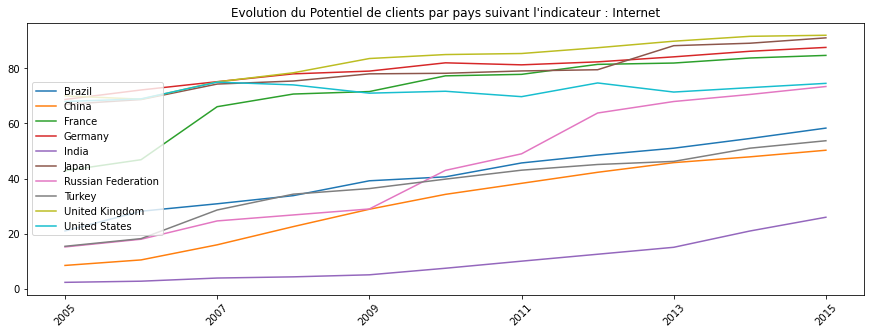

-------------------------------------------------------Richesse---------------------------------------------------------------------------------------


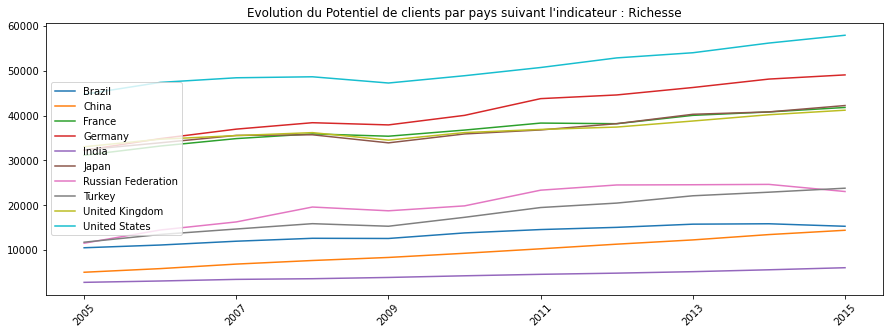

-------------------------------------------------------Lycéens---------------------------------------------------------------------------------------


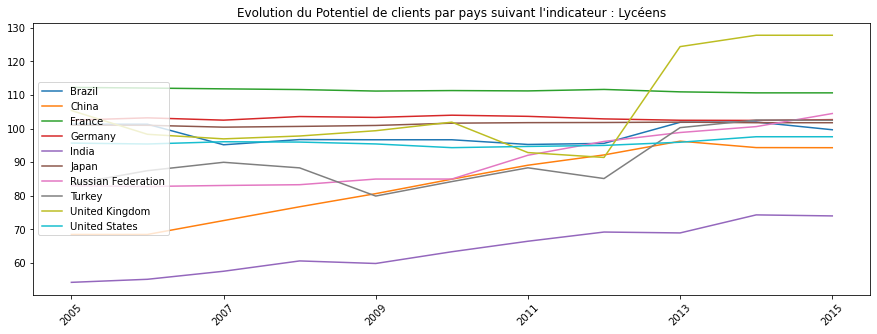

-------------------------------------------------------Etudiants---------------------------------------------------------------------------------------


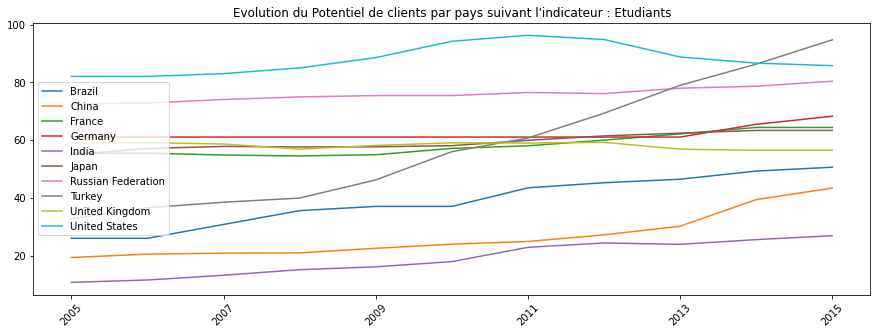

-------------------------------------------------------Population_15_24---------------------------------------------------------------------------------------


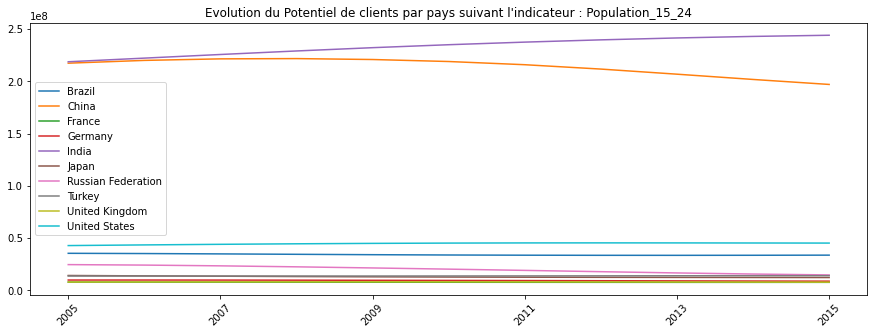

In [39]:

for ind in liste_nom_indicateurs_finale:
    print('-------------------------------------------------------' + ind + '---------------------------------------------------------------------------------------')
    fig = plt.figure(1, figsize=(15, 5))
    plt.title("Evolution du Potentiel de clients par pays suivant l'indicateur : " + ind)
    df_temp = df_data2[df_data2['Country Name'].isin(meilleurs_clients) & (df_data2['Indicator Code']==liste_code_indicateurs_finale[liste_nom_indicateurs_finale.index(ind)])]
    del df_temp['Indicator Code']
    del df_temp['Country Code']
    del df_temp['Indicator Name']
    del df_temp['Taux_remplissage']
    del df_temp['Long definition']
    df_temp.set_index('Country Name',inplace = True)
    j=0
    for pays in df_temp.index.tolist():
        df_temp.iloc[j,:].plot()
        j=j+1
    plt.legend(df_temp.index.tolist(), loc = 'center left')
    plt.xticks(rotation=45)
    plt.show();

In [40]:
# Vérifier si les données pour notre potentiel client sur les années 2020-2100 sont exloitables pour faire des prédictions
data_2020_2100=EdStatsData[['Country Name', 'Indicator Code','2020','2025','2030','2035','2040','2045','2050','2055', '2060' ,'2065','2070' ,'2075','2080','2085','2090','2095','2100']]
# Dataframe avec les données de notre potentiel client sur les années 2020-2100 
data_2020_2100=data_2020_2100[data_2020_2100['Indicator Code'].isin(liste_code_indicateurs_finale)][data_2020_2100['Country Name'].isin(meilleurs_clients)]
data_2020_2100=data_2020_2100.drop(['Country Name', 'Indicator Code'],axis=1)
if data_2020_2100.notnull().sum().sum()==0:
    print('Aucune valeur exploitable pour notre potentiel clients entre 2020 et 2100')

Aucune valeur exploitable pour notre potentiel clients entre 2020 et 2100


Les données des prochaines années sont nulles, nous pouvons utiliser les séries temporelles pour faire des prédictions